This ipython file is the project by Hongyi Tang and Weijian Li for course 12752.
There are four ipython files in the project in total. Each file consist of one cluster analysis task.
In this file, the cluster analysis is demonstrated to 3 building types.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

%matplotlib inline

Please download the dataset and change the file path.

In [3]:
# Read in CBECS data
f = open('C:/F16-12-752-master/projects/thongyi_weijian1/data/CBECS.csv')
data = pd.read_csv(f,sep=',', header='infer', parse_dates=[1])
#data = pd.DataFrame.from_csv('../../lectures/data/CBECS.csv') 
data = data.set_index('PUBID')
data.tail()

,REGION,CENDIV,PBA,FREESTN,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,FKCLBTU,FKWTBTU,FKCKBTU,FKOTBTU,DHHTBTU,DHCLBTU,DHWTBTU,DHCKBTU,DHOTBTU,PUBCLIM
PUBID,,,,,,,,,,,,,,,,,,,,,
6716,3,5,14,1.0,108000,7,1,6,2,1,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2
6717,3,7,5,1.0,1700,2,5,5,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6718,2,3,26,1.0,2000,2,1,4,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6719,1,2,12,1.0,19250,4,1,4,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6720,3,5,14,1.0,142000,7,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


Office, inpatient health care and service buildings are selected.

In [26]:
energydata=pd.DataFrame()

type_B=[2,16,26] # office, inpatient health care and service
type_C=[1,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,91]

data_type=data
data_type=data_type[data_type.NGUSED!=2]

for i in type_C:
    data_type=data_type[data_type.PBA!=i]

energydata['Building Type']=data_type.PBA
index=['ELBTU','NGBTU','ELVNBTU','NGHTBTU']
for i in index:
    energydata[i]=data_type[i]/data_type.SQFT

In [27]:
energydata = energydata.dropna(how='any')
energydata = energydata[~(energydata == 0).any(axis=1)]
PBA1=energydata['Building Type'].unique()
count=[]
for i in PBA1:
    count.append([energydata[energydata['Building Type']==i].shape[0],i])
count

[[714, 2], [244, 26], [283, 16]]

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


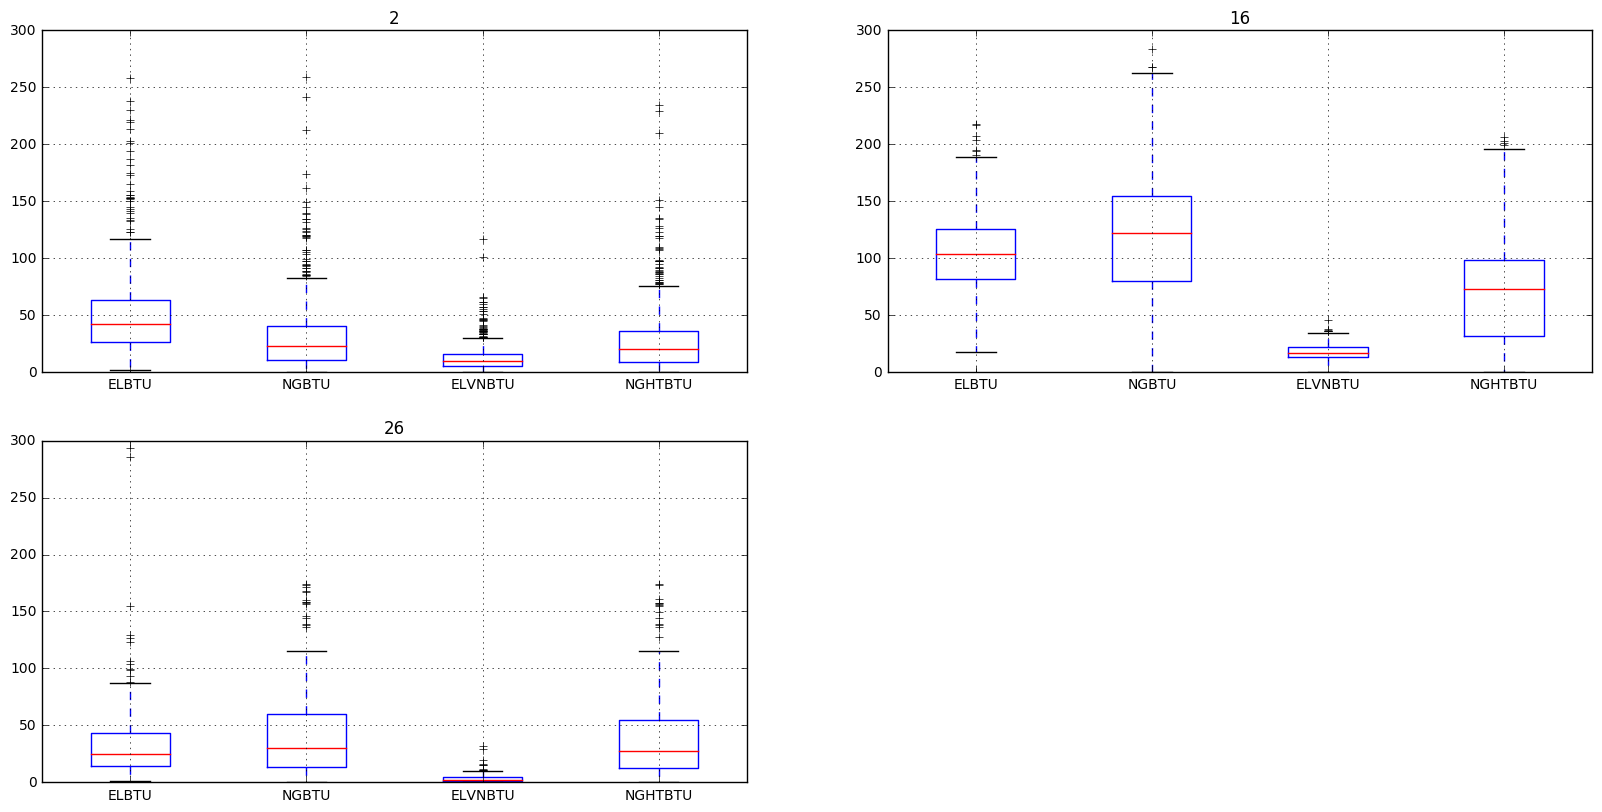

In [29]:
fig1 = plt.figure(figsize=(20,15))
times=1
data_seperate=[]
for i in range(len(type_B)):
    x=energydata[energydata['Building Type']==type_B[i]]
    x=x.drop(x.columns[0],axis=1)
    data_seperate.append(x) 
for i in range(len(type_B)):
    plt.subplot(len(type_B),2,times)
    data_seperate[i].boxplot()
    times=times+1
    plt.title(type_B[i])
    plt.ylim(0,300)

922
308
11


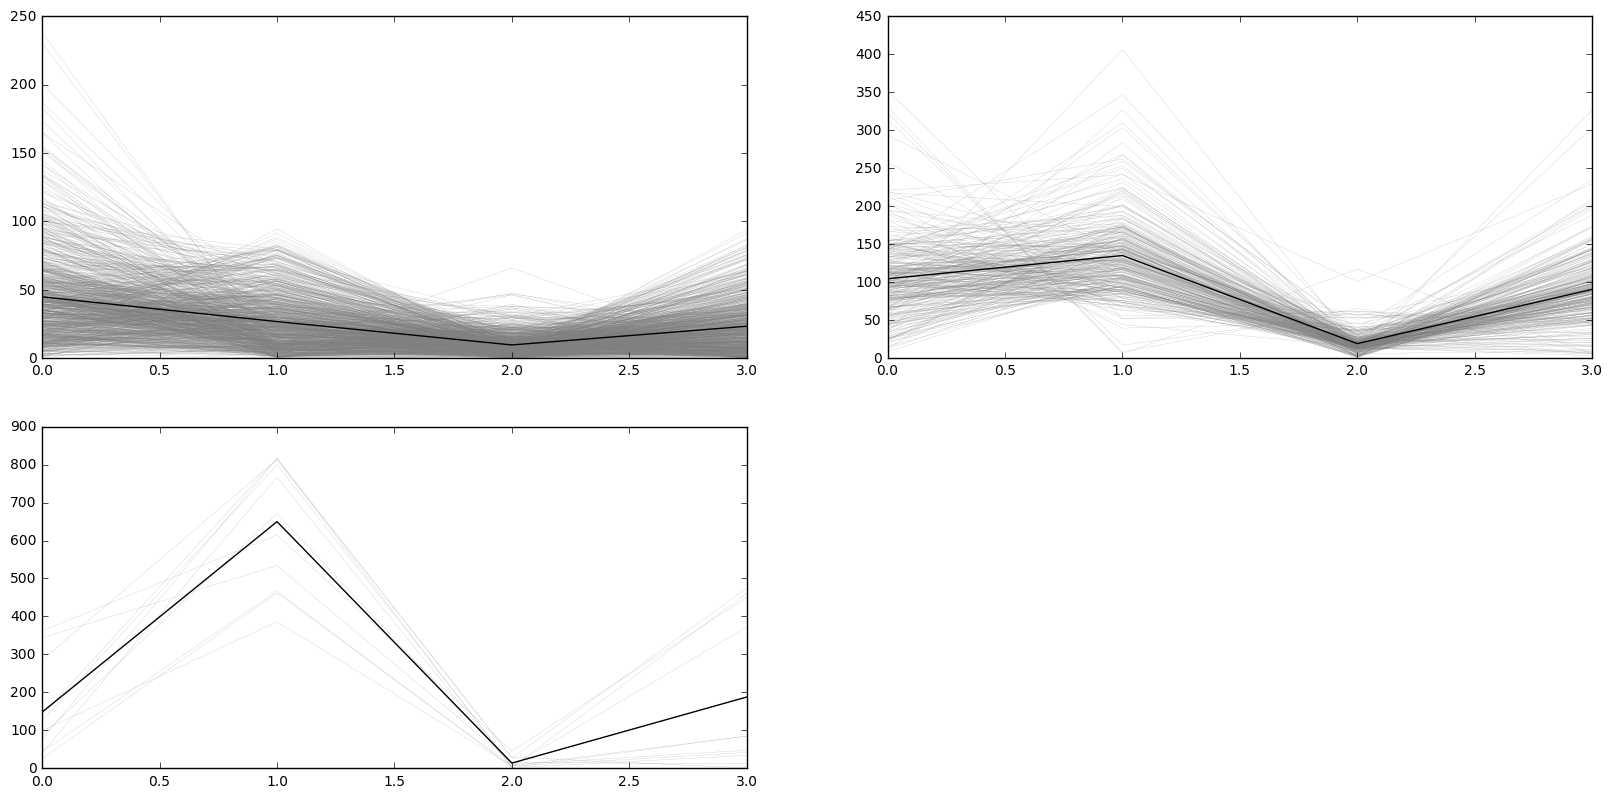

In [30]:
y=pd.DataFrame()
for i in range(len(type_B)):
    y=y.append(data_seperate[i])
X=y.as_matrix().astype(np.float32)
from sklearn.cluster import KMeans
num_clust = 3
clusters = KMeans(n_clusters=num_clust).fit(X)
cluster_assignments = clusters.predict(X)
# plt.subplot(num_clust+1,1,1)
# plt.plot(cluster_assignments[:150])
# plt.ylim([0.2,1.1])
fig2 = plt.figure(figsize=(20,15))
for cluster_id in range(len(clusters.cluster_centers_)):
    plt.subplot(num_clust,2,cluster_id+1)
    cluster_members = X[cluster_assignments==cluster_id,:]
    print(len(cluster_members))
    for i in range(len(cluster_members)):
        plt.plot(cluster_members[i,:], color='grey', lw='0.1')
    plt.plot(clusters.cluster_centers_[cluster_id,:], color='k', lw='1')

In [31]:
# There is one cluster has only 11 elements.
y['assignment']=cluster_assignments
y=y[y.assignment!=2] # Drop those weird data samples.
del y['assignment']
X=y.as_matrix().astype(np.float32)

213
228
789


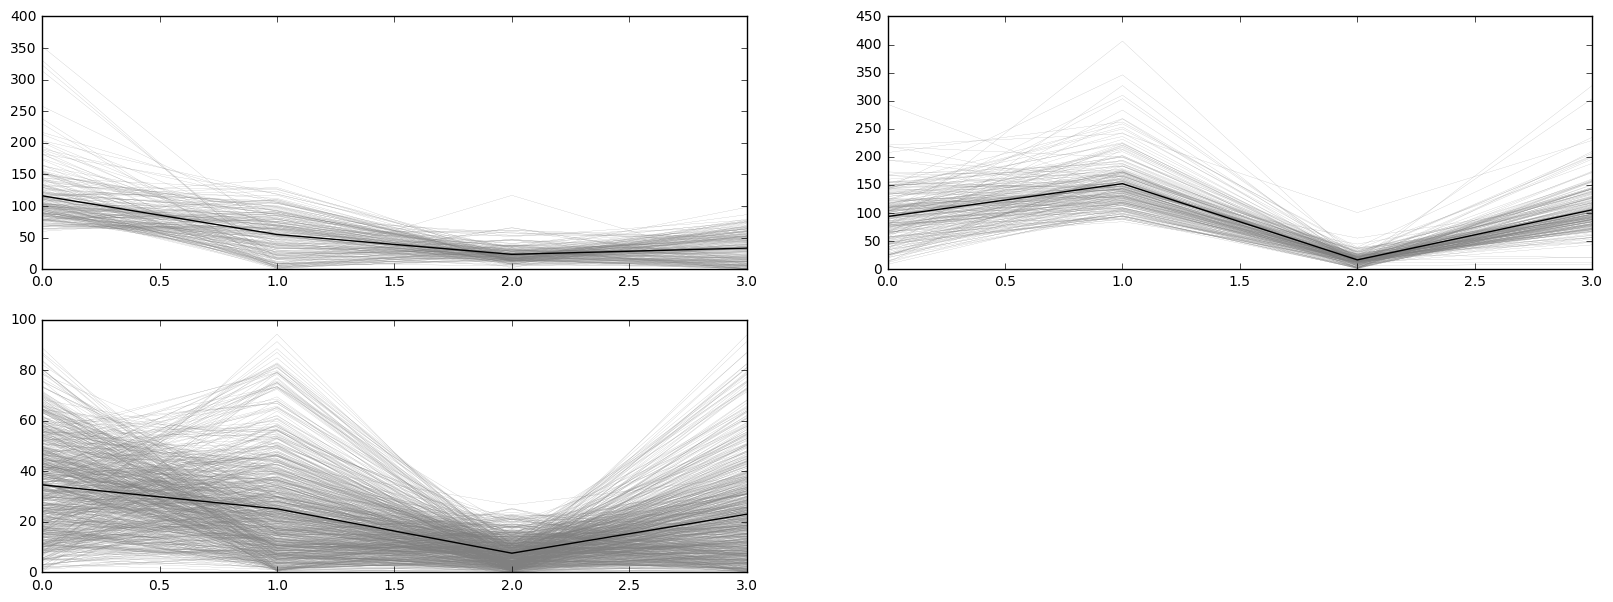

In [32]:
num_clust = 3
clusters = KMeans(n_clusters=num_clust).fit(X)
cluster_assignments = clusters.predict(X)
# plt.subplot(num_clust+1,1,1)
# plt.plot(cluster_assignments[:150])
# plt.ylim([0.2,1.1])
fig2 = plt.figure(figsize=(20,15))
for cluster_id in range(len(clusters.cluster_centers_)):
    plt.subplot(num_clust+1,2,cluster_id+1)
    cluster_members = X[cluster_assignments==cluster_id,:]
    print(len(cluster_members))
    for i in range(len(cluster_members)):
        plt.plot(cluster_members[i,:], color='grey', lw='0.1')
    plt.plot(clusters.cluster_centers_[cluster_id,:], color='k', lw='1')

The connection between assignment and building type need to be found by visually judging. The connecting can be different every time the file was run.

In [33]:
y['assignment']=cluster_assignments
y=y.join(data['PBA'],how='inner')
y['judge']=1
y['judge'].iloc[np.where(np.array(y.PBA)==2)]=2
y['judge'].iloc[np.where(np.array(y.PBA)==16)]=1
y['judge'].iloc[np.where(np.array(y.PBA)==26)]=0
y[y['judge']==y['assignment']].count()


C:\Users\Daniel\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ELBTU         741
NGBTU         741
ELVNBTU       741
NGHTBTU       741
assignment    741
PBA           741
judge         741
dtype: int64

In [34]:
a=741/(714+283+244)

In [35]:
a

0.59709911361805